# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor as RF

In [157]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [163]:
RF_airbnb = RF(max_features = 4, n_estimators = 500, random_state=0).fit(X_train, y_train)
y_hat_RF = RF_airbnb.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

0.19035830548538796

In [164]:
y_hat_RF = RF_airbnb.predict(X_train)
np.mean((y_train - y_hat_RF)**2)

0.025134148085959863

In [165]:
feature_imp = pd.DataFrame({'importance': RF_airbnb.feature_importances_}, index=feature_names)
feature_imp_sorted = feature_imp.sort_values(by='importance', ascending=False)
top_15_features = feature_imp_sorted.head(15)
print("Most Important Features:")
print(top_15_features)

Most Important Features:
                                importance
Entire home/apt                   0.141702
Private room                      0.113006
longitude                         0.101782
latitude                          0.082503
host_id                           0.059872
id                                0.059746
reviews_per_month                 0.058205
availability_365                  0.053296
nearby_subway_line_counts         0.052294
minimum_nights                    0.041821
number_of_reviews                 0.041740
calculated_host_listings_count    0.031243
Manhattan                         0.023289
Shared room                       0.016256
Midtown                           0.009087


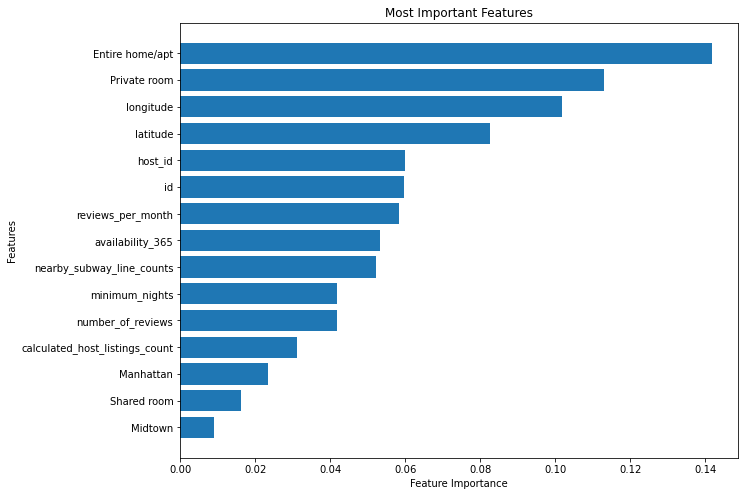

In [166]:
import matplotlib.pyplot as plt
feature_imp_sorted = feature_imp_sorted[::-1]
top_15_features = feature_imp_sorted.tail(15)
plt.figure(figsize=(10, 8))
plt.barh(top_15_features.index, top_15_features['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Most Important Features')
plt.show()